# WEEK-5.0- Multiple_Lin_Regression-Ridge Reg

### Contents

* Business Understanding
* Data Understanding
* Data Preparation
* Exploratory Data Analysis
* Building a Linear Model
* Evaluation

### Business Understanding

#### Problem Statement

A large child education toy company which sells edutainment tablets and gaming systems
both online and in retail stores wanted to analyze the customer data. They are operating
from last few years and maintaining all transactional information data. The given data
‘CustomerData.csv’ is a sample of customer level data extracted and processed for the
analysis from various set of transactional files.

The objectives of today’s activity are :
* Building a model to predict the customer revenue based on other factors and understand the influence of other attributes on revenue

In [ ]:
# Now identify the target from the problem given

### Identify right Error Metrics

##### Error Metrics for Regression

* Mean Absolute Error (MAE):

$$MAE = \dfrac{1}{n}\times|\sum_{i = 1}^{n}y_{i} - \hat{y_{i}}|$$


* Mean Squared Error (MSE):

$$MSE = \dfrac{1}{n}\times(\sum_{i = 1}^{n}y_{i} - \hat{y_{i}})^2$$


* Root Mean Squared Error (RMSE):

$$RMSE = \sqrt{\dfrac{1}{n}\times(\sum_{i = 1}^{n}y_{i} - \hat{y_{i}})^2}$$


* Mean Absolute Percentage Error (MAPE):

$$MAPE = \dfrac{100}{n}\times\mid\dfrac{\sum_{i = 1}^{n}y_{i} - \hat{y_{i}}}{y_{i}}\mid$$


### Loading the required libraries

In [ ]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import math

import statsmodels.api as sm
#from patsy import dmatrices

from IPython.display import Image

### Loading the data

In [ ]:
data = pd.read_csv("CustomerData.csv", header=0)
data.head()


,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


In [ ]:
data['City'].value_counts()

1    2843
2     366
Name: City, dtype: int64

In [ ]:
type(data)

pandas.core.frame.DataFrame

### Data Understanding

In [ ]:
data.shape

(3209, 14)

#### Display the columns

In [ ]:
data.columns

Index(['CustomerID', 'City', 'NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild',
       'Tenure', 'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'FavoriteChannelOfTransaction',
       'FavoriteGame', 'TotalRevenueGenerated'],
      dtype='object')

In [ ]:
data.index

RangeIndex(start=0, stop=3209, step=1)

#### See the top rows of the data

In [ ]:
data.head()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


In [ ]:
data.dtypes

CustomerID                        int64
City                              int64
NoOfChildren                      int64
MinAgeOfChild                     int64
MaxAgeOfChild                     int64
Tenure                            int64
FrquncyOfPurchase                 int64
NoOfUnitsPurchased                int64
FrequencyOFPlay                   int64
NoOfGamesPlayed                   int64
NoOfGamesBought                   int64
FavoriteChannelOfTransaction     object
FavoriteGame                     object
TotalRevenueGenerated           float64
dtype: object

#### Summary Statistics using describe()

Descriptive or Summary Statistic of the numeric columns

    It excludes character column and calculate summary statistics only for numeric columns

In [ ]:
data.shape

(3209, 14)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,3209.0,2605.000000,926.502833,1001.0,1803.00,2605.00,3407.00,4209.00
City,3209.0,1.114054,0.317927,1.0,1.00,1.00,1.00,2.00
NoOfChildren,3209.0,2.128389,1.035092,1.0,1.00,2.00,3.00,11.00
MinAgeOfChild,3209.0,4.960735,3.714191,0.0,4.00,5.00,6.00,113.00
MaxAgeOfChild,3209.0,7.990651,8.784084,3.0,6.00,7.00,8.00,113.00
Tenure,3209.0,347.520411,90.520118,100.0,301.00,368.00,417.00,472.00
FrquncyOfPurchase,3209.0,16.269554,8.441670,1.0,11.00,14.00,19.00,119.00
NoOfUnitsPurchased,3209.0,14.684014,7.182029,1.0,10.00,13.00,17.00,112.00
FrequencyOFPlay,3209.0,1568.207853,1810.630464,0.0,446.00,1029.00,2029.00,27829.00
NoOfGamesPlayed,3209.0,93.627921,88.936372,0.0,37.00,70.00,119.00,1166.00


In [ ]:
data.describe(include=['object']).T

,count,unique,top,freq
FavoriteChannelOfTransaction,3209,2,Favorite,2637
FavoriteGame,3209,2,Uniform,3083


In [ ]:
data['FavoriteGame'].value_counts()

Uniform     3083
Favorite     126
Name: FavoriteGame, dtype: int64

In [ ]:
data['FavoriteChannelOfTransaction'].value_counts()

Favorite    2637
Uniform      572
Name: FavoriteChannelOfTransaction, dtype: int64

In [ ]:
data.describe(include='all') 

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
count,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209.000000,3209,3209,3209.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Favorite,Uniform,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2637,3083,NaN
mean,2605.000000,1.114054,2.128389,4.960735,7.990651,347.520411,16.269554,14.684014,1568.207853,93.627921,14.761608,NaN,NaN,168.477183
std,926.502833,0.317927,1.035092,3.714191,8.784084,90.520118,8.441670,7.182029,1810.630464,88.936372,8.773910,NaN,NaN,81.798528
min,1001.000000,1.000000,1.000000,0.000000,3.000000,100.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,100.000000
25%,1803.000000,1.000000,1.000000,4.000000,6.000000,301.000000,11.000000,10.000000,446.000000,37.000000,10.000000,NaN,NaN,116.640000
50%,2605.000000,1.000000,2.000000,5.000000,7.000000,368.000000,14.000000,13.000000,1029.000000,70.000000,14.000000,NaN,NaN,142.390000
75%,3407.000000,1.000000,3.000000,6.000000,8.000000,417.000000,19.000000,17.000000,2029.000000,119.000000,19.000000,NaN,NaN,191.250000


#### Data type of each of the variable

In [ ]:
data.dtypes 

CustomerID                        int64
City                              int64
NoOfChildren                      int64
MinAgeOfChild                     int64
MaxAgeOfChild                     int64
Tenure                            int64
FrquncyOfPurchase                 int64
NoOfUnitsPurchased                int64
FrequencyOFPlay                   int64
NoOfGamesPlayed                   int64
NoOfGamesBought                   int64
FavoriteChannelOfTransaction     object
FavoriteGame                     object
TotalRevenueGenerated           float64
dtype: object

### Data Cleaning and  Preparation

#### Observations:
    1. City is interpreted as numeric (which is actually categorical) and FavouriteGame, FavouriteChannelOfTransaction are interpreted as objects.
    2. max age of children is 113 which must be a wrong entry
    3. Summary statistics for CustomerID is not meaningful

So we now change these appropriately i.e, convert city, favourite game and favourite channel to category, exclude customer id from the data for analysis and treat wrong entry records

#### Check and delete CustomerID attribute

In [ ]:
data.head()

,CustomerID,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1001,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1002,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1003,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1004,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1005,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


In [ ]:
np.size(np.unique(data.CustomerID, return_counts=True)[0])

3209

In [ ]:
np.unique(data.FavoriteGame, return_counts=True)

(array(['Favorite', 'Uniform'], dtype=object), array([ 126, 3083]))

In [ ]:
data.drop('CustomerID', axis=1, inplace=True)


In [ ]:
data.columns

Index(['City', 'NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild', 'Tenure',
       'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'FavoriteChannelOfTransaction',
       'FavoriteGame', 'TotalRevenueGenerated'],
      dtype='object')

In [ ]:
data.iloc[440:450,:]

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
440,1,3,5,7,239,39,40,3378,430,38,Favorite,Uniform,497.48
441,1,3,5,9,209,14,14,2317,131,14,Favorite,Uniform,120.00
442,1,2,2,4,461,19,17,2548,330,17,Uniform,Uniform,124.98
443,1,2,5,8,356,14,15,375,31,13,Favorite,Uniform,162.49
444,1,1,5,5,350,24,24,1969,84,24,Favorite,Uniform,227.50
445,1,3,3,5,330,52,51,2608,156,34,Favorite,Uniform,604.75
446,1,2,3,6,373,28,16,366,67,26,Uniform,Uniform,133.55
447,1,2,6,6,442,7,7,0,0,1,Favorite,Uniform,123.70
448,1,4,3,6,353,22,12,332,33,22,Uniform,Uniform,107.50
449,1,2,3,6,371,17,13,1369,65,17,Favorite,Uniform,102.51


#### Data type conversion 
    Using astype('category') convert 'City', 'FavoriteChannelOfTransaction', 'FavoriteGame' attributes to a categorical data type .

In [ ]:
for col in ['City', 'FavoriteChannelOfTransaction', 'FavoriteGame']:
    data[col] = data[col].astype('category')

In [ ]:
data.dtypes

City                            category
NoOfChildren                       int64
MinAgeOfChild                      int64
MaxAgeOfChild                      int64
Tenure                             int64
FrquncyOfPurchase                  int64
NoOfUnitsPurchased                 int64
FrequencyOFPlay                    int64
NoOfGamesPlayed                    int64
NoOfGamesBought                    int64
FavoriteChannelOfTransaction    category
FavoriteGame                    category
TotalRevenueGenerated            float64
dtype: object

In [ ]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
City,3209,2,1,2843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NoOfChildren,3209,NaN,NaN,NaN,2.12839,1.03509,1,1,2,3,11
MinAgeOfChild,3209,NaN,NaN,NaN,4.96074,3.71419,0,4,5,6,113
MaxAgeOfChild,3209,NaN,NaN,NaN,7.99065,8.78408,3,6,7,8,113
Tenure,3209,NaN,NaN,NaN,347.52,90.5201,100,301,368,417,472
FrquncyOfPurchase,3209,NaN,NaN,NaN,16.2696,8.44167,1,11,14,19,119
NoOfUnitsPurchased,3209,NaN,NaN,NaN,14.684,7.18203,1,10,13,17,112
FrequencyOFPlay,3209,NaN,NaN,NaN,1568.21,1810.63,0,446,1029,2029,27829
NoOfGamesPlayed,3209,NaN,NaN,NaN,93.6279,88.9364,0,37,70,119,1166
NoOfGamesBought,3209,NaN,NaN,NaN,14.7616,8.77391,0,10,14,19,115


In [ ]:
data.loc[(data['MinAgeOfChild']==113) | (data['MaxAgeOfChild']==113),].shape #Only colon after comma implies consider all the rows

(20, 13)

In [ ]:
data.loc[(data['MinAgeOfChild']==113) | (data['MaxAgeOfChild']==113),] #Only colon after comma implies consider all the rows

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
570,1,2,4,113,205,17,17,158,51,8,Favorite,Uniform,218.85
584,1,2,3,113,379,6,6,242,32,0,Favorite,Uniform,100.44
599,1,2,113,113,436,26,26,10502,562,26,Favorite,Uniform,300.00
804,1,3,6,113,286,6,6,2137,72,6,Favorite,Uniform,102.50
878,1,2,5,113,202,9,8,483,68,9,Favorite,Uniform,105.00
897,1,2,5,113,355,16,16,1700,142,10,Favorite,Uniform,270.00
1097,1,3,6,113,432,12,12,2261,194,12,Favorite,Uniform,160.00
1144,1,3,5,113,405,16,14,4438,130,16,Uniform,Uniform,117.50
1413,1,3,4,113,171,15,11,1728,41,15,Favorite,Uniform,107.50
1621,1,2,6,113,187,10,9,731,39,10,Uniform,Uniform,115.00


In [ ]:
print (data.shape)

(3209, 13)


#### Removing outliers

    Ignore records with age as 113

In [ ]:
data=data.loc[(data['MinAgeOfChild'] !=113) | (data['MaxAgeOfChild']!=113),:] 

In [ ]:
print (data.shape)

(3206, 13)


#### Missing Data

    pandas primarily uses the value np.nan to represent missing data. 

Check for missing value

    is.null() output boolean i.e. if missing value then true else false. 

    sum function counts 'true' thus gives total number of missing values

In [ ]:
data.isnull().sum()

City                            0
NoOfChildren                    0
MinAgeOfChild                   0
MaxAgeOfChild                   0
Tenure                          0
FrquncyOfPurchase               0
NoOfUnitsPurchased              0
FrequencyOFPlay                 0
NoOfGamesPlayed                 0
NoOfGamesBought                 0
FavoriteChannelOfTransaction    0
FavoriteGame                    0
TotalRevenueGenerated           0
dtype: int64

In this case there are no missing values. However if we find any missing values in the data, as a rule of thumb


    If the perticular row/column has more number of missing values then drop that perticular rows/column 
    
        e.g. To drop any rows that have missing data use data.dropna(axis=0, inplace=True) 
        
    Otherwise, impute/fill missing data based on domain knowledge or using imputation techniques
        
        e.g. To fill missing values with mean use data.fillna(data.mean(), inplace=True)      

#### Correlation between numeric attributes 

In [ ]:
num_attr = data.select_dtypes(include=['int64', 'float64']).columns
num_attr

Index(['NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild', 'Tenure',
       'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'TotalRevenueGenerated'],
      dtype='object')

If the correlation coefficient is one, the variables have a perfect positive correlation. 

    This means that if one variable moves a given amount, the second moves proportionally in the same direction. 

If correlation coefficient is zero, no relationship exists between the variables. 

    If one variable moves, you can make no predictions about the movement of the other variable; they are uncorrelated.

If correlation coefficient is –1, the variables are perfectly negatively correlated (or inversely correlated) and move in opposition to each other.

    If one variable increases, the other variable decreases proportionally. 

In [ ]:
data[num_attr].corr()

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated
NoOfChildren,1.000000,-0.347147,0.212386,0.085770,0.138494,0.138081,0.166047,0.214791,0.132328,0.108462
MinAgeOfChild,-0.347147,1.000000,0.098086,-0.161665,-0.100339,-0.091109,-0.089819,-0.116010,-0.084461,-0.026918
MaxAgeOfChild,0.212386,0.098086,1.000000,-0.051244,-0.019124,-0.019833,-0.008006,0.006756,-0.021179,-0.010015
Tenure,0.085770,-0.161665,-0.051244,1.000000,0.193046,0.191971,0.241398,0.273462,0.187943,0.116005
FrquncyOfPurchase,0.138494,-0.100339,-0.019124,0.193046,1.000000,0.934053,0.279028,0.397175,0.947708,0.662707
NoOfUnitsPurchased,0.138081,-0.091109,-0.019833,0.191971,0.934053,1.000000,0.310640,0.435378,0.868145,0.749845
FrequencyOFPlay,0.166047,-0.089819,-0.008006,0.241398,0.279028,0.310640,1.000000,0.738007,0.285863,0.231632
NoOfGamesPlayed,0.214791,-0.116010,0.006756,0.273462,0.397175,0.435378,0.738007,1.000000,0.398602,0.292234
NoOfGamesBought,0.132328,-0.084461,-0.021179,0.187943,0.947708,0.868145,0.285863,0.398602,1.000000,0.494682
TotalRevenueGenerated,0.108462,-0.026918,-0.010015,0.116005,0.662707,0.749845,0.231632,0.292234,0.494682,1.000000


### Exploratory Data Analysis

#### Uni-variate Analysis

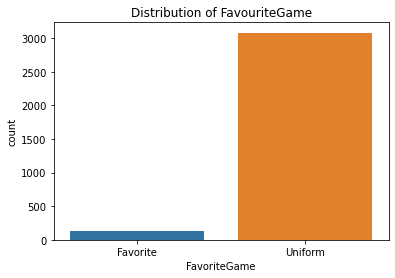

In [ ]:
# Plotting Categorical Data
sns.countplot(x="FavoriteGame", data=data)
plt.title('Distribution of FavouriteGame')
plt.show()

<Figure size 288x576 with 0 Axes>

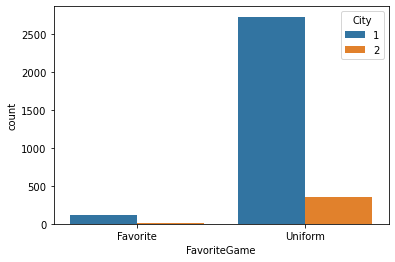

<Figure size 288x576 with 0 Axes>

In [ ]:
 x=sns.countplot(x="FavoriteGame", hue="City", data=data)
h=8
w=4
plt.figure(figsize=(w,h))

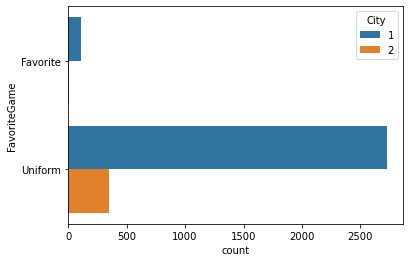

In [ ]:
 x=sns.countplot(y="FavoriteGame", hue="City", data=data)

## grouping with additional cat values use catplot


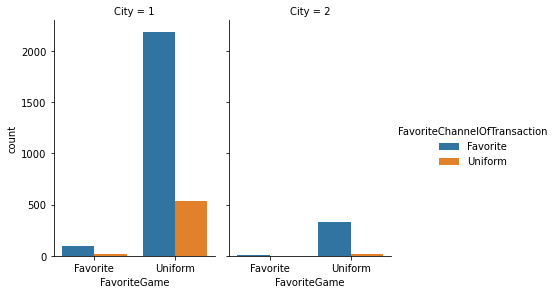

In [ ]:
sns.catplot(x="FavoriteGame", hue="FavoriteChannelOfTransaction", col="City",data=data, kind="count",height=4, aspect=.7)

# manually changing the order

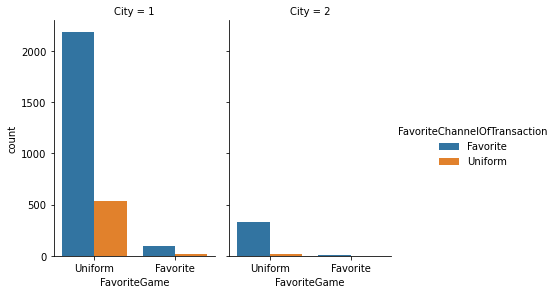

In [ ]:
order=['Uniform','Favorite']
sns.catplot(x="FavoriteGame",order=order ,hue="FavoriteChannelOfTransaction", col="City",data=data, kind="count",height=4, aspect=.7)

/Users/dhanasreedevi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


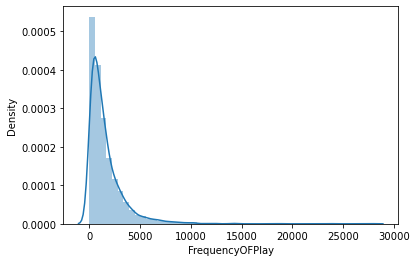

In [ ]:
# Plotting Numerical Data

# Make default histogram of FrequencyOFPlay
sns.distplot(data["FrequencyOFPlay"],rug=False, hist=True )
# Bins can be changes
plt.show()

#### Bi-variate Analysis

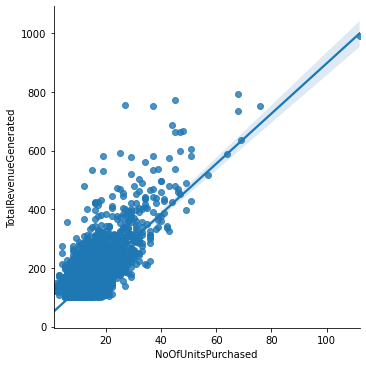

In [ ]:
# Plotting Numeric VS Numeric Data
sns.lmplot(x='NoOfUnitsPurchased', y='TotalRevenueGenerated', data=data)
plt.show()

## including third variable as color

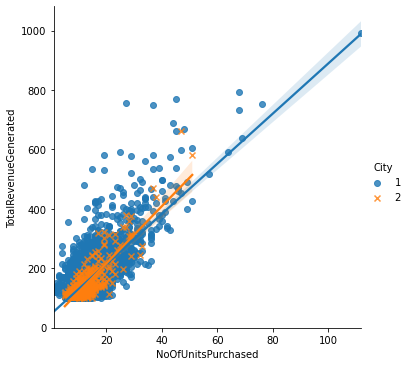

In [ ]:
sns.lmplot(x='NoOfUnitsPurchased', y='TotalRevenueGenerated',hue='City', data=data, markers=["o", "x"])
plt.show()

## show the third variable on different columns

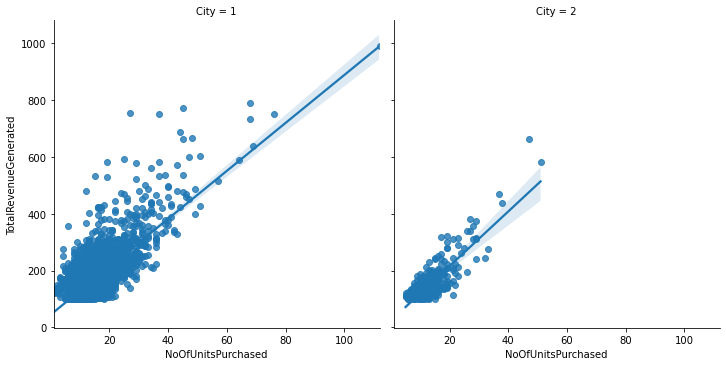

In [ ]:

sns.lmplot(x='NoOfUnitsPurchased', y='TotalRevenueGenerated',col="City", data=data)
plt.show()

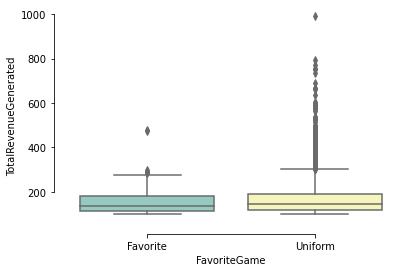

In [ ]:
# Plotting Numeric VS Categorical Data
sns.boxplot(x="FavoriteGame", y="TotalRevenueGenerated", data=data, palette="Set3")
sns.despine(offset=10, trim=True)
plt.show()

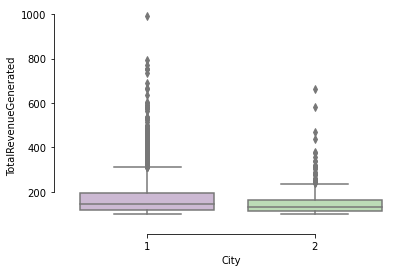

In [ ]:
# Plotting Numeric VS Categorical Data
sns.boxplot(x="City", y="TotalRevenueGenerated", data=data, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.show()

## nesting of categorical

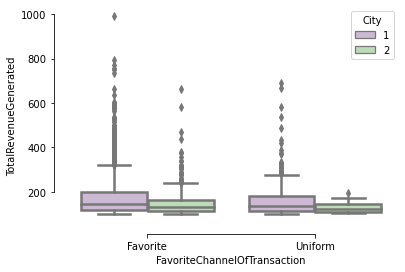

In [ ]:
# Plotting Numeric VS Categorical Data
sns.boxplot(x="FavoriteChannelOfTransaction", y="TotalRevenueGenerated",hue='City', data=data, palette="PRGn",linewidth=2.5)
sns.despine(offset=10, trim=True)
plt.show()

In [ ]:
data.shape

(3206, 13)

## Building a Linear Model

### Simple Linear Regression

Linear regression is an approach for predicting a quantitative response using a single feature (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?

$y$ is the response
    
$x$ is the feature
    
$\beta_0$ is the intercept
    
$\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the model coefficients. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict TotalRevenueGenerated!

#### Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the least squares criterion, which means we are find the line (mathematically) which minimizes the sum of squared residuals (or "sum of squared errors"):

<img src="SLR.png" width="400">

What elements are present in the diagram?

* The black dots are the observed values of x and y.
* The blue line is our least squares line.
* The red lines are the residuals, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?

* $\beta_0$ is the intercept (the value of $y$ when $x$=0)
* $\beta_1$ is the slope (the change in $y$ divided by change in $x$)



#### Mulitple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called multiple linear regression:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times NoOfGamesBought + \beta_2 \times FrquncyOfPurchase + \beta_3 \times NoOfUnitsPurchased$

Let's use Statsmodels to estimate these coefficients:

In [ ]:
data.head()

,City,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,FavoriteChannelOfTransaction,FavoriteGame,TotalRevenueGenerated
0,1,2,3,8,210,11,11,2344,108,10,Uniform,Uniform,107.51
1,1,2,3,6,442,20,20,245,22,7,Favorite,Uniform,382.40
2,1,4,3,5,424,18,18,1059,130,18,Favorite,Uniform,135.01
3,1,1,6,6,261,11,9,365,34,11,Favorite,Uniform,125.00
4,1,3,6,9,422,44,31,1066,102,44,Uniform,Uniform,335.05


In [ ]:
data.dtypes

City                            category
NoOfChildren                       int64
MinAgeOfChild                      int64
MaxAgeOfChild                      int64
Tenure                             int64
FrquncyOfPurchase                  int64
NoOfUnitsPurchased                 int64
FrequencyOFPlay                    int64
NoOfGamesPlayed                    int64
NoOfGamesBought                    int64
FavoriteChannelOfTransaction    category
FavoriteGame                    category
TotalRevenueGenerated            float64
dtype: object

In [ ]:
categorical_Attributes = data.select_dtypes(include=['category']).columns
print(categorical_Attributes)


Index(['City', 'FavoriteChannelOfTransaction', 'FavoriteGame'], dtype='object')


In [ ]:
data = pd.get_dummies(columns=categorical_Attributes, data=data, prefix=categorical_Attributes, prefix_sep="_", drop_first=True)

In [ ]:
data.head()

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated,City_2,FavoriteChannelOfTransaction_Uniform,FavoriteGame_Uniform
0,2,3,8,210,11,11,2344,108,10,107.51,0,1,1
1,2,3,6,442,20,20,245,22,7,382.40,0,0,1
2,4,3,5,424,18,18,1059,130,18,135.01,0,0,1
3,1,6,6,261,11,9,365,34,11,125.00,0,0,1
4,3,6,9,422,44,31,1066,102,44,335.05,0,1,1


In [ ]:
data.shape

(3206, 13)

## scatter matrix can be used to visualize any trend in data

In [1]:
from pandas.plotting import scatter_matrix

In [2]:
scatter_matrix(data, figsize=(30, 30), diagonal='kde')
plt.show()

NameError: name 'data' is not defined

#### Building our 1st model 

In [ ]:
data.columns

Index(['NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild', 'Tenure',
       'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'TotalRevenueGenerated', 'City_2',
       'FavoriteChannelOfTransaction_Uniform', 'FavoriteGame_Uniform'],
      dtype='object')

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
# fitting SLR

In [ ]:
formula = " ~ ".join((data.columns.values[-4], data.columns.values[5]))
print (formula)

TotalRevenueGenerated ~ NoOfUnitsPurchased


In [ ]:
mod = smf.ols(formula=formula, data=data) # Describe model

res = mod.fit()                           # Fit model

print(res.summary())  

                              OLS Regression Results                             
Dep. Variable:     TotalRevenueGenerated   R-squared:                       0.562
Model:                               OLS   Adj. R-squared:                  0.562
Method:                    Least Squares   F-statistic:                     4116.
Date:                   Tue, 27 Apr 2021   Prob (F-statistic):               0.00
Time:                           14:16:34   Log-Likelihood:                -17341.
No. Observations:                   3206   AIC:                         3.469e+04
Df Residuals:                       3204   BIC:                         3.470e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Interc

In [ ]:
y=42+8x

x=10

y=42+80=122

SyntaxError: invalid syntax (<ipython-input-126-cf0d4562fada>, line 1)

In [ ]:
data.head()

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,TotalRevenueGenerated,City_2,FavoriteChannelOfTransaction_Uniform,FavoriteGame_Uniform
0,2,3,8,210,11,11,2344,108,10,107.51,0,1,1
1,2,3,6,442,20,20,245,22,7,382.40,0,0,1
2,4,3,5,424,18,18,1059,130,18,135.01,0,0,1
3,1,6,6,261,11,9,365,34,11,125.00,0,0,1
4,3,6,9,422,44,31,1066,102,44,335.05,0,1,1


##### The more practical way 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [ ]:
target = data['TotalRevenueGenerated'].values
indp_data = data.loc[:,data.columns != 'TotalRevenueGenerated']
indp_data = pd.get_dummies(indp_data, drop_first=True)

In [ ]:
indp_data.head

<bound method NDFrame.head of       NoOfChildren  MinAgeOfChild  MaxAgeOfChild  Tenure  FrquncyOfPurchase  \
0                2              3              8     210                 11   
1                2              3              6     442                 20   
2                4              3              5     424                 18   
3                1              6              6     261                 11   
4                3              6              9     422                 44   
...            ...            ...            ...     ...                ...   
3204             2              4              6     365                 16   
3205             2              2              5     348                 20   
3206             2              5              7     341                 16   
3207             2              6              7     368                 18   
3208             3              2              6     389                 25   

      NoOfUnitsPurcha

In [ ]:
target(y)===1
indp_data===13

SyntaxError: invalid syntax (<ipython-input-131-de804687635a>, line 1)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(indp_data,target,test_size=0.25,random_state=3405)

In [ ]:
X_train.columns

Index(['NoOfChildren', 'MinAgeOfChild', 'MaxAgeOfChild', 'Tenure',
       'FrquncyOfPurchase', 'NoOfUnitsPurchased', 'FrequencyOFPlay',
       'NoOfGamesPlayed', 'NoOfGamesBought', 'City_2',
       'FavoriteChannelOfTransaction_Uniform', 'FavoriteGame_Uniform'],
      dtype='object')

In [ ]:
Y_test

array([100.  , 107.48, 154.12, 100.13, 117.5 , 114.23, 116.25, 220.  ,
       115.  , 141.69, 140.01, 385.38, 107.46, 148.64, 292.5 , 435.01,
       107.51, 110.01, 175.45, 132.5 , 128.51, 295.  , 127.5 , 118.62,
       139.93, 112.96, 152.5 , 120.  , 109.57, 212.  , 196.52, 278.72,
       112.8 , 138.48, 165.  , 123.04, 102.5 , 107.  , 170.  , 145.  ,
       197.5 , 142.64, 231.04, 190.  , 119.15, 309.93, 170.  , 323.15,
       100.  , 106.25, 102.5 , 239.23, 107.5 , 137.24, 200.92, 102.5 ,
       106.46, 112.52, 134.99, 142.47, 135.02, 155.43, 195.01, 143.05,
       232.96, 120.  , 142.52, 167.5 , 120.  , 145.  , 115.  , 770.95,
       109.98, 132.83, 110.  , 304.5 , 242.5 , 300.37, 107.51, 161.5 ,
       175.01, 107.5 , 130.  , 137.5 , 187.49, 100.  , 162.5 , 150.  ,
       110.  , 212.49, 127.65, 187.26, 127.5 , 103.  , 147.94, 227.76,
       173.48, 260.48, 141.65, 145.  , 120.75, 150.4 , 100.  , 132.49,
       100.01, 102.5 , 145.25, 204.07, 254.05, 200.8 , 156.47, 180.  ,
      

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


(2404, 12)
(2404,)
(802, 12)
(802,)


In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(X_train[indp_data.columns])
X_train[indp_data.columns] = scaler.transform(X_train[indp_data.columns])
X_test[indp_data.columns] = scaler.transform(X_test[indp_data.columns])

<ipython-input-137-831c52dc719c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[indp_data.columns] = scaler.transform(X_train[indp_data.columns])
/Users/dhanasreedevi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-137-831c52dc719c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

##### Alternative method- Intercept not included

In [ ]:
X_train.head()

,NoOfChildren,MinAgeOfChild,MaxAgeOfChild,Tenure,FrquncyOfPurchase,NoOfUnitsPurchased,FrequencyOFPlay,NoOfGamesPlayed,NoOfGamesBought,City_2,FavoriteChannelOfTransaction_Uniform,FavoriteGame_Uniform
1383,0.000,0.333333,0.027273,0.620968,0.067797,0.072072,0.013139,0.014580,0.052174,0.0,0.0,1.0
619,0.125,0.166667,0.036364,0.612903,0.059322,0.063063,0.003916,0.009434,0.034783,0.0,0.0,0.0
1388,0.125,0.277778,0.036364,0.728495,0.101695,0.108108,0.028931,0.071184,0.113043,0.0,0.0,1.0
1593,0.125,0.222222,0.045455,0.862903,0.152542,0.117117,0.035838,0.064322,0.165217,0.0,1.0,1.0
2681,0.000,0.277778,0.018182,0.983871,0.110169,0.117117,0.005727,0.016295,0.121739,0.0,0.0,1.0


In [ ]:
y=x

In [ ]:
regression_model = sm.OLS(Y_train,X_train)
result = regression_model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.944
Method:                 Least Squares   F-statistic:                              3389.
Date:                Tue, 27 Apr 2021   Prob (F-statistic):                        0.00
Time:                        14:16:50   Log-Likelihood:                         -12541.
No. Observations:                2404   AIC:                                  2.511e+04
Df Residuals:                    2392   BIC:                                  2.518e+04
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                                           coef    std err          t      P>|t|      [0.025      0.975]
---------------

In [ ]:
print(regression_model)

In [ ]:
data.loc[115:120,["TotalRevenueGenerated"]]

,TotalRevenueGenerated
115,181.51
116,154.07
117,104.24
118,171.77
119,100.13
120,123.06


In [ ]:
# use the model to make predictions
pred_train = result.predict(X_train)
pred_test = result.predict(X_test)
print(pred_test)

1950    138.533979
1354    145.876935
1714    256.584700
119     130.744132
805      96.474289
           ...    
927     110.068346
1025    161.351151
2781    123.031770
3114    187.280311
653     287.145751
Length: 802, dtype: float64


###### Evaluating model performance

Good the model 

1. One method to check it is by looking at the R^2 value. This gives us the information about how much variance in our target could be explanined by all independent variables. The closer R^2 to 1 the better the model is. This tells us about goodness of our model
2. Next we check how close our predictions are to the actual values. The difference of actual and predicted is called error. For a good model the error should be as small as possible. There are various kinds of error metrics. In this case we use mean squared error computed as 
1/n*∑(y-(yhat))^2 
where y are the actual values, yhat are the predicted values and n is total number of records

In [ ]:
print("The R2 value on train dataset: {} \n".format(r2_score(y_pred=pred_train, y_true=Y_train)))
print("The Mean Squared Error on train dataset: {} \n".format(mean_squared_error(y_pred=pred_train,y_true=Y_train)))
print("The Mean Squared Error on test dataset: {} \n".format(mean_squared_error(y_pred=pred_test,y_true=Y_test)))


The R2 value on train dataset: 0.7147538930057978 

The Mean Squared Error on train dataset: 1989.4534719870612 

The Mean Squared Error on test dataset: 1701.6464224333945 



In [ ]:
learning curves: plot train/test data
    
    
    
    
    

#### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge, Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Model initialization
regression_model = Ridge(normalize=True,random_state =100)
#Fit the data(train the model)
model= regression_model.fit(X_train, Y_train)
# Predict
y_predicted = model.predict(X_train)
# model evaluation
rmse = mean_squared_error(Y_train, y_predicted)
r2 =model.score(X_train, Y_train)
# printing values
print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [ 15.25172436   8.69613996  -6.91646954   1.76087247 204.01885292
 325.6668836   40.0869627   37.79286772  37.78324106  -6.59556598
  -8.95793523  -8.35624736]
Intercept: 97.96418750782269
Root mean squared error:  3757.2540263037668
R2 score:  0.4612881883983002


In [ ]:
# compare the RMSE before ridge and after Ridge:
# RMSE after rige is more
# may be because we didnt clean the data, or we didnt do any feature engineering
# in reality ridge definitely reduces the error

In [ ]:
model

Ridge(normalize=True, random_state=100)

#### Lasso Regression model

In [ ]:
# Model initialization
regression_model = Lasso()
#Fit the data(train the model)
model= regression_model.fit(X_train, Y_train)
# Predict
y_predicted = model.predict(X_train)
# model evaluation
rmse = mean_squared_error(Y_train, y_predicted)
r2 =model.score(X_train, Y_train)
# printing values
print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [  0.           0.          -0.           0.           0.
 711.61818221   0.           0.           0.          -1.88204614
  -6.33227501  -0.        ]
Intercept: 83.65884515783205
Root mean squared error:  3301.5540500088723
R2 score:  0.5266260543126202


In [ ]:
model

Lasso()

In [ ]:
################HAPPY LEARNING##############